In [ ]:
# Install Essential Libraries
!pip install ultralytics
!pip install yolov8

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.3/721.3 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 21.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
!pip install ffmpeg-python
!apt-get install -y locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
locales is already the newest version (2.35-0ubuntu3.6).
0 upgraded, 0 newly installed, 0 to remove and 38 not upgraded.
Generating locales (this might take a while)...
  en_US.UTF-8... done
Generation complete.


In [ ]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
import ffmpeg
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rohanmathanolikara","key":"0fe54c779a835556e3b15b6dad31c149"}'}

In [ ]:
!pip install -q kaggle
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d pkdarabi/cardetection
!unzip -q cardetection.zip -d cardetection

 92% 89.0M/96.6M [00:01<00:00, 78.3MB/s]
100% 96.6M/96.6M [00:01<00:00, 74.8MB/s]


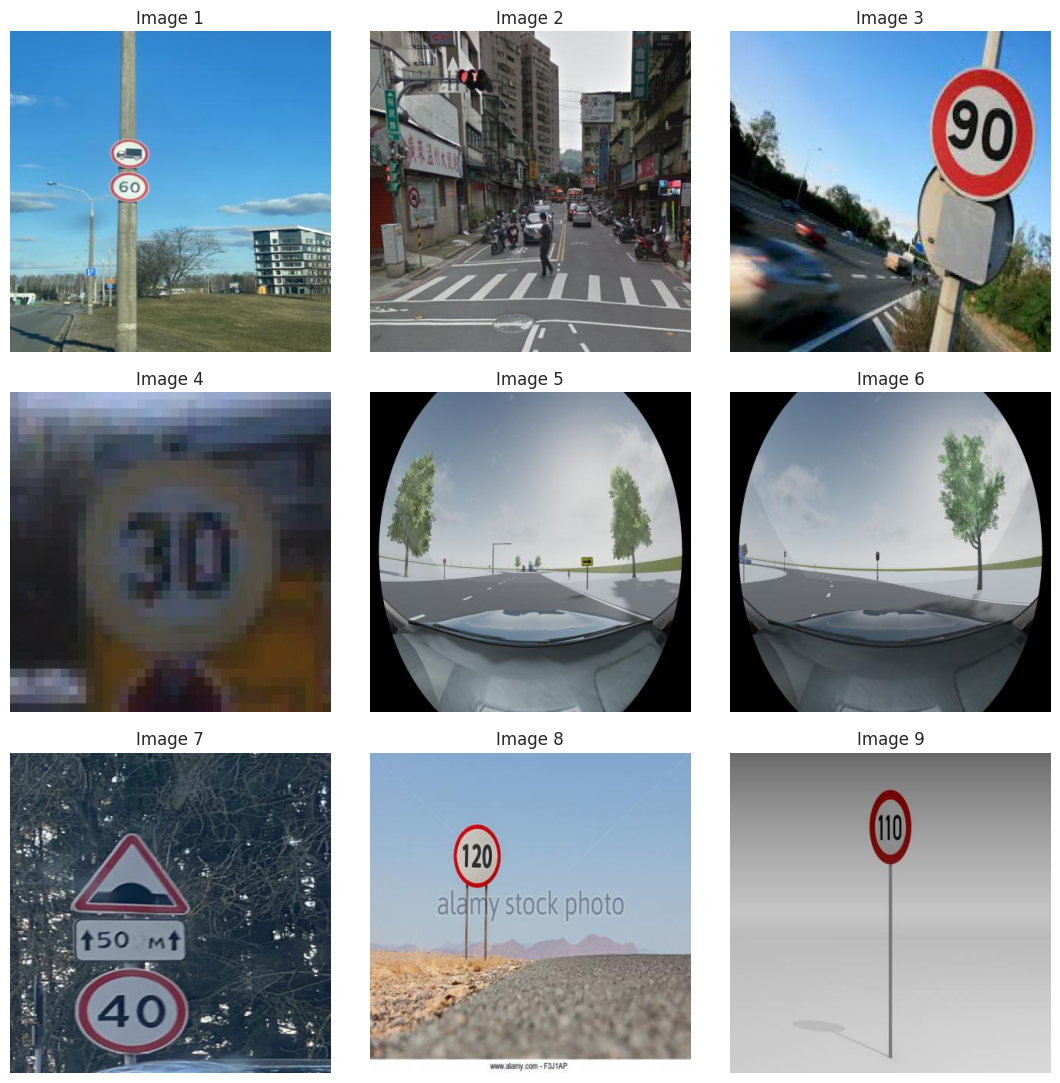

In [ ]:

Image_dir = '/content/cardetection/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)


rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Corrected image path
image_path = "/content/cardetection/train/images/00000_00000_00000_png.rf.55d47572c5980af0892b0c2ada6dae77.jpg"
image = cv2.imread(image_path)
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 416x416 and 3 channels.


100%|██████████| 6.23M/6.23M [00:00<00:00, 16.4MB/s]



image 1/1 /content/cardetection/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg: 416x416 1 traffic light, 11.2ms
Speed: 1.8ms preprocess, 11.2ms inference, 705.0ms postprocess per image at shape (1, 3, 416, 416)


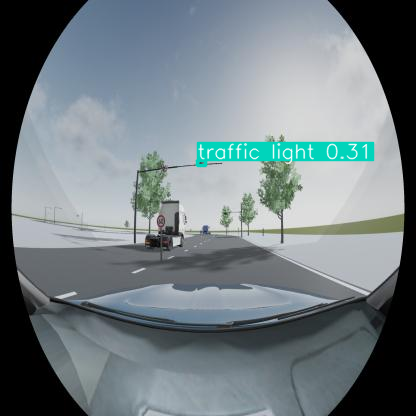

In [ ]:
# Use a pretrained YOLOv8n model
model = YOLO("yolov8n.pt")

# Use the model to detect object
image = "/content/cardetection/train/images/FisheyeCamera_1_00228_png.rf.e7c43ee9b922f7b2327b8a00ccf46a4c.jpg"
result_predict = model.predict(source = image, imgsz=(416))

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.yaml').load('yolov8n.pt')

# Training The Final Model
Result_Final_model = Final_model.train(data="/content/cardetection/data.yaml",epochs=100, imgsz = 416, batch = 64 ,lr0=0.0001, dropout= 0.15, device = 0)

Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.yaml, data=/content/cardetection/data.yaml, epochs=100, time=None, patience=100, batch=64, imgsz=416, save=True, save_period=-1, cache=False, device=0, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.15, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 

100%|██████████| 755k/755k [00:00<00:00, 28.1MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/cardetection/train/labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:02<00:00, 1264.61it/s]


train: New cache created: /content/cardetection/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/cardetection/valid/labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 524.43it/s]


val: New cache created: /content/cardetection/valid/labels.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      3.91G     0.8497      3.488      1.097         18        416: 100%|██████████| 56/56 [00:50<00:00,  1.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.05it/s]

                   all        801        944     0.0536      0.781      0.137       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      3.92G     0.7196      2.313      1.016         29        416: 100%|██████████| 56/56 [00:34<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        801        944      0.207      0.361      0.248      0.202



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      3.92G     0.7213      1.977      1.003         23        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        801        944      0.363      0.518      0.396      0.325



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      3.92G     0.7181      1.752     0.9987         17        416: 100%|██████████| 56/56 [00:34<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]


                   all        801        944      0.563        0.5      0.505      0.423

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      3.91G     0.6885      1.511     0.9847         16        416: 100%|██████████| 56/56 [00:33<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.594      0.614      0.626      0.523



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      3.89G     0.6637      1.349     0.9748         18        416: 100%|██████████| 56/56 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.601      0.631      0.634      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      3.89G     0.6554      1.235     0.9707         21        416: 100%|██████████| 56/56 [00:34<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        801        944      0.694      0.641      0.679      0.568



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      3.89G     0.6512      1.154     0.9561         25        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        801        944      0.764      0.706      0.778      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      3.91G      0.638      1.089     0.9603         26        416: 100%|██████████| 56/56 [00:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        801        944      0.882      0.722      0.807      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      3.89G     0.6252      1.012     0.9493         25        416: 100%|██████████| 56/56 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944       0.78      0.751      0.813      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      3.91G     0.6188     0.9742     0.9475         21        416: 100%|██████████| 56/56 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        801        944      0.815      0.727        0.8      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      3.91G      0.609     0.9349     0.9462         20        416: 100%|██████████| 56/56 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        801        944      0.846      0.757      0.841      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      3.91G     0.6152     0.9194     0.9501         30        416: 100%|██████████| 56/56 [00:34<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        801        944      0.852      0.743      0.814      0.685



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      3.91G     0.5894     0.8717     0.9407         19        416: 100%|██████████| 56/56 [00:33<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.902      0.762      0.851      0.724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      3.91G     0.6129     0.8527     0.9437         25        416: 100%|██████████| 56/56 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        801        944      0.872      0.733      0.826        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      3.92G      0.605     0.8509     0.9434         26        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.899      0.765      0.862      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      3.89G     0.5943     0.8022     0.9413         23        416: 100%|██████████| 56/56 [00:33<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.45it/s]

                   all        801        944      0.889       0.81      0.877      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      3.92G     0.5927     0.7952     0.9331         23        416: 100%|██████████| 56/56 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        801        944      0.912        0.8      0.881      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      3.91G     0.5837     0.7558     0.9329         28        416: 100%|██████████| 56/56 [00:34<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.01it/s]

                   all        801        944      0.909      0.817      0.889      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      3.89G     0.5885     0.7752      0.937         19        416: 100%|██████████| 56/56 [00:40<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        801        944      0.921      0.797      0.869      0.751



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      3.91G     0.5746     0.7394     0.9324         22        416: 100%|██████████| 56/56 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        801        944       0.91      0.818      0.882      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      3.92G     0.5773     0.7449     0.9342         20        416: 100%|██████████| 56/56 [00:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.33it/s]

                   all        801        944      0.936       0.82      0.888      0.762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      3.91G     0.5708     0.7094     0.9278         21        416: 100%|██████████| 56/56 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        801        944      0.951      0.798       0.89      0.768



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      3.91G     0.5771     0.7167     0.9337         23        416: 100%|██████████| 56/56 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        801        944      0.922      0.799      0.884      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      3.92G     0.5652     0.7129     0.9311         20        416: 100%|██████████| 56/56 [00:33<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        801        944      0.904      0.834      0.892       0.76



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      3.91G     0.5568     0.6877     0.9265         17        416: 100%|██████████| 56/56 [00:32<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.40it/s]

                   all        801        944      0.949      0.819      0.893      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      3.91G     0.5543     0.6751     0.9246         17        416: 100%|██████████| 56/56 [00:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]


                   all        801        944      0.944      0.816      0.899      0.772

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.92G     0.5536     0.6711     0.9283         19        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        801        944      0.939       0.82      0.891      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.92G     0.5491     0.6567     0.9231         26        416: 100%|██████████| 56/56 [00:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        801        944      0.929      0.817        0.9      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.92G      0.562     0.6554     0.9326         11        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.27it/s]

                   all        801        944      0.935      0.827      0.896      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.92G     0.5582     0.6535     0.9287         21        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        801        944       0.94      0.834      0.908      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.92G     0.5573     0.6495     0.9257         20        416: 100%|██████████| 56/56 [00:31<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        801        944      0.935      0.836      0.906      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.92G     0.5542     0.6519     0.9284         21        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        801        944      0.925      0.845      0.909      0.777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.91G     0.5548     0.6334     0.9235         13        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        801        944      0.928      0.842      0.912      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.91G     0.5378     0.6213     0.9212         26        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.962      0.814       0.91      0.778



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.91G     0.5369     0.6071     0.9179         21        416: 100%|██████████| 56/56 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        801        944      0.957      0.828      0.908      0.791



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.92G     0.5375     0.5946     0.9196         20        416: 100%|██████████| 56/56 [00:33<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        801        944      0.933      0.829      0.902      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.89G     0.5427     0.5998     0.9239         20        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        801        944       0.94      0.841      0.912      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.92G     0.5404     0.6017     0.9186         23        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]

                   all        801        944      0.949      0.849      0.919      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.92G     0.5393     0.6062     0.9215         23        416: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        801        944      0.923      0.816      0.891      0.775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.92G     0.5324     0.5896     0.9176         25        416: 100%|██████████| 56/56 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        801        944      0.945       0.85       0.91      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.92G      0.526     0.5856     0.9211         18        416: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.17it/s]

                   all        801        944      0.932      0.848      0.917      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.91G     0.5321     0.5878     0.9217         17        416: 100%|██████████| 56/56 [00:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        801        944       0.96      0.838      0.907      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.92G     0.5276     0.5731     0.9168         26        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        801        944      0.942      0.838      0.915      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      3.89G     0.5268     0.5815      0.917         21        416: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]

                   all        801        944      0.915      0.846      0.903       0.78



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.92G     0.5287     0.5788     0.9174         21        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        801        944      0.947       0.83      0.907       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.91G     0.5234     0.5535     0.9143         23        416: 100%|██████████| 56/56 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        801        944      0.926      0.843      0.906      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.91G     0.5232      0.574     0.9198         26        416: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        801        944      0.942      0.877      0.922        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.92G     0.5129     0.5492     0.9097         20        416: 100%|██████████| 56/56 [00:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.16it/s]

                   all        801        944      0.922      0.864      0.917      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.91G     0.5144     0.5439     0.9135         16        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        801        944      0.936      0.857      0.916      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      3.91G     0.5184     0.5507      0.911         27        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.961      0.854      0.921      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.92G     0.5094     0.5476     0.9129         21        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.923      0.872      0.926      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.91G     0.5068     0.5464     0.9127         22        416: 100%|██████████| 56/56 [00:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.40it/s]

                   all        801        944      0.957      0.864      0.927      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.92G      0.509     0.5217     0.9096         27        416: 100%|██████████| 56/56 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        801        944      0.937      0.881      0.928      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.92G     0.5068     0.5368     0.9122         27        416: 100%|██████████| 56/56 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.21it/s]

                   all        801        944      0.939      0.881      0.923      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.91G     0.5098     0.5231     0.9115         27        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        801        944      0.944      0.858      0.917      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      3.92G     0.5054     0.5257     0.9074         20        416: 100%|██████████| 56/56 [00:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.34it/s]

                   all        801        944      0.929       0.89      0.926      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.92G     0.4993     0.5209     0.9068         21        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.953      0.853      0.927      0.806



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.91G     0.5097     0.5156     0.9098         23        416: 100%|██████████| 56/56 [00:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.41it/s]

                   all        801        944      0.943      0.858       0.92      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.92G     0.5011     0.5271     0.9087         18        416: 100%|██████████| 56/56 [00:31<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.956      0.842       0.92      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.91G     0.5027     0.5048     0.9057         19        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        801        944      0.947      0.844       0.92      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      3.91G     0.4935     0.4969     0.9046         27        416: 100%|██████████| 56/56 [00:33<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        801        944      0.937      0.867       0.92      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      3.91G     0.4976     0.5043      0.905         20        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        801        944      0.926      0.892      0.928      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.91G     0.5063      0.511     0.9088         25        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.15it/s]

                   all        801        944      0.969       0.84      0.926      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.91G     0.5033     0.4954     0.9065         20        416: 100%|██████████| 56/56 [00:31<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.942      0.875      0.929      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.92G     0.4887     0.4964     0.9053         22        416: 100%|██████████| 56/56 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.18it/s]

                   all        801        944      0.956      0.863      0.926      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.91G     0.5019     0.4882     0.9077         25        416: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        801        944      0.955      0.868      0.929      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      3.91G     0.4902     0.4899      0.905         22        416: 100%|██████████| 56/56 [00:32<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.13it/s]

                   all        801        944      0.945      0.878      0.931      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.89G     0.4911     0.4894     0.9054         26        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        801        944      0.947      0.884      0.929      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.92G     0.4928     0.4778     0.9035         22        416: 100%|██████████| 56/56 [00:31<00:00,  1.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]


                   all        801        944      0.952      0.872      0.927      0.813

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.89G     0.4802     0.4762     0.9025         21        416: 100%|██████████| 56/56 [00:30<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        801        944      0.955      0.862       0.93      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.89G     0.4823     0.4592     0.8998         28        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.947       0.87      0.926      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.91G     0.4757     0.4694     0.9028         25        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        801        944      0.921      0.901      0.933      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      3.91G     0.4821     0.4738     0.9048         19        416: 100%|██████████| 56/56 [00:32<00:00,  1.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:06<00:00,  1.12it/s]

                   all        801        944       0.93      0.896      0.929      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.91G     0.4801     0.4689     0.9016         25        416: 100%|██████████| 56/56 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        801        944      0.922      0.873      0.924      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.91G     0.4774     0.4656     0.9022         26        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        801        944      0.937      0.871      0.921      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.92G     0.4738     0.4607     0.9012         21        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        801        944      0.936      0.868      0.931      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.92G     0.4713     0.4606     0.8979         25        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.31it/s]

                   all        801        944      0.944      0.895      0.932      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.92G     0.4674     0.4498     0.8982         20        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.30it/s]

                   all        801        944      0.952      0.879      0.934      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      3.91G      0.465     0.4479     0.9004         29        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.25it/s]

                   all        801        944      0.955      0.879      0.933      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.92G     0.4732     0.4509      0.895         26        416: 100%|██████████| 56/56 [00:31<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.22it/s]

                   all        801        944      0.942      0.889      0.931      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.91G     0.4657     0.4462     0.8966         17        416: 100%|██████████| 56/56 [00:31<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        801        944      0.954      0.888      0.933      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.92G     0.4739     0.4424     0.9004         23        416: 100%|██████████| 56/56 [00:31<00:00,  1.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.32it/s]

                   all        801        944      0.935      0.881      0.935      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.91G     0.4581     0.4264     0.8985         33        416: 100%|██████████| 56/56 [00:31<00:00,  1.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.44it/s]

                   all        801        944      0.937      0.886      0.933      0.818



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.92G     0.4619     0.4472     0.8952         24        416: 100%|██████████| 56/56 [00:32<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.38it/s]

                   all        801        944      0.955      0.874       0.93      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      3.92G     0.4579     0.4186     0.8972         25        416: 100%|██████████| 56/56 [00:33<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        801        944      0.938      0.885      0.933      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      3.91G     0.4603     0.4292     0.8976         27        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]

                   all        801        944      0.945      0.883      0.931      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.92G     0.4543     0.4229     0.8988         15        416: 100%|██████████| 56/56 [00:32<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]

                   all        801        944       0.96      0.873      0.937      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.91G     0.4486      0.418     0.8978         20        416: 100%|██████████| 56/56 [00:32<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        801        944      0.942      0.879      0.933      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.91G     0.4525     0.4153     0.8927         19        416: 100%|██████████| 56/56 [00:32<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]


                   all        801        944      0.948      0.898      0.938      0.826
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100       3.9G     0.4447       0.28     0.8441         12        416: 100%|██████████| 56/56 [00:33<00:00,  1.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        801        944      0.944      0.881      0.934       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.91G     0.4418     0.2712     0.8476         12        416: 100%|██████████| 56/56 [00:31<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.945      0.879      0.935      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.91G     0.4337     0.2681     0.8431         12        416: 100%|██████████| 56/56 [00:29<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.35it/s]

                   all        801        944      0.957      0.876      0.937      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.91G     0.4377      0.261     0.8437         14        416: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.19it/s]

                   all        801        944      0.963      0.879      0.937      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100       3.9G      0.429     0.2574     0.8442         10        416: 100%|██████████| 56/56 [00:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.23it/s]

                   all        801        944      0.966      0.877      0.935      0.822



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.91G     0.4361     0.2625     0.8442         15        416: 100%|██████████| 56/56 [00:29<00:00,  1.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.47it/s]

                   all        801        944      0.937      0.889      0.935      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100       3.9G      0.423     0.2532      0.842         12        416: 100%|██████████| 56/56 [00:30<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.42it/s]

                   all        801        944      0.959      0.888      0.938      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.91G     0.4235     0.2518     0.8347         10        416: 100%|██████████| 56/56 [00:31<00:00,  1.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.37it/s]

                   all        801        944      0.959      0.887      0.937      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100       3.9G     0.4299     0.2519     0.8391         10        416: 100%|██████████| 56/56 [00:29<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.17it/s]

                   all        801        944       0.96      0.885      0.938      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      3.91G     0.4275     0.2543     0.8361         11        416: 100%|██████████| 56/56 [00:29<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.20it/s]

                   all        801        944      0.954      0.889      0.938      0.827



100 epochs completed in 1.076 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:07<00:00,  1.06s/it]


                   all        801        944      0.954      0.889      0.938      0.827
           Green Light        801        122      0.882      0.676      0.775      0.485
             Red Light        801        108      0.876      0.656      0.759      0.493
       Speed Limit 100        801         52      0.949      0.942      0.984      0.907
       Speed Limit 110        801         17       0.96      0.882      0.939      0.882
       Speed Limit 120        801         60      0.967      0.983      0.993       0.93
        Speed Limit 20        801         56      0.999      0.982      0.987      0.894
        Speed Limit 30        801         74      0.958      0.973      0.988      0.927
        Speed Limit 40        801         55      0.981      0.946      0.992       0.89
        Speed Limit 50        801         71      0.951      0.873      0.953      0.842
        Speed Limit 60        801         76      0.945       0.91      0.957      0.885
        Speed Limit 7

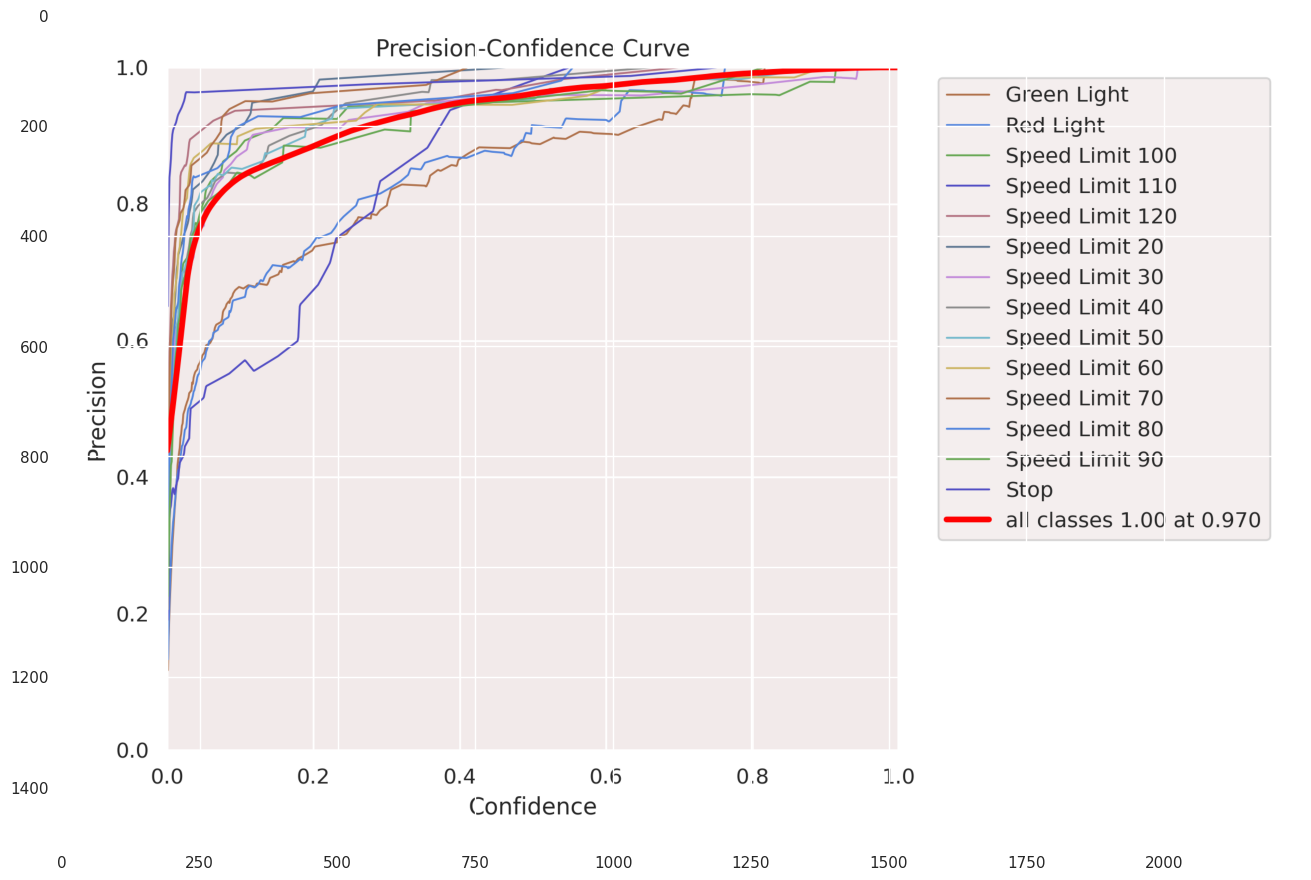

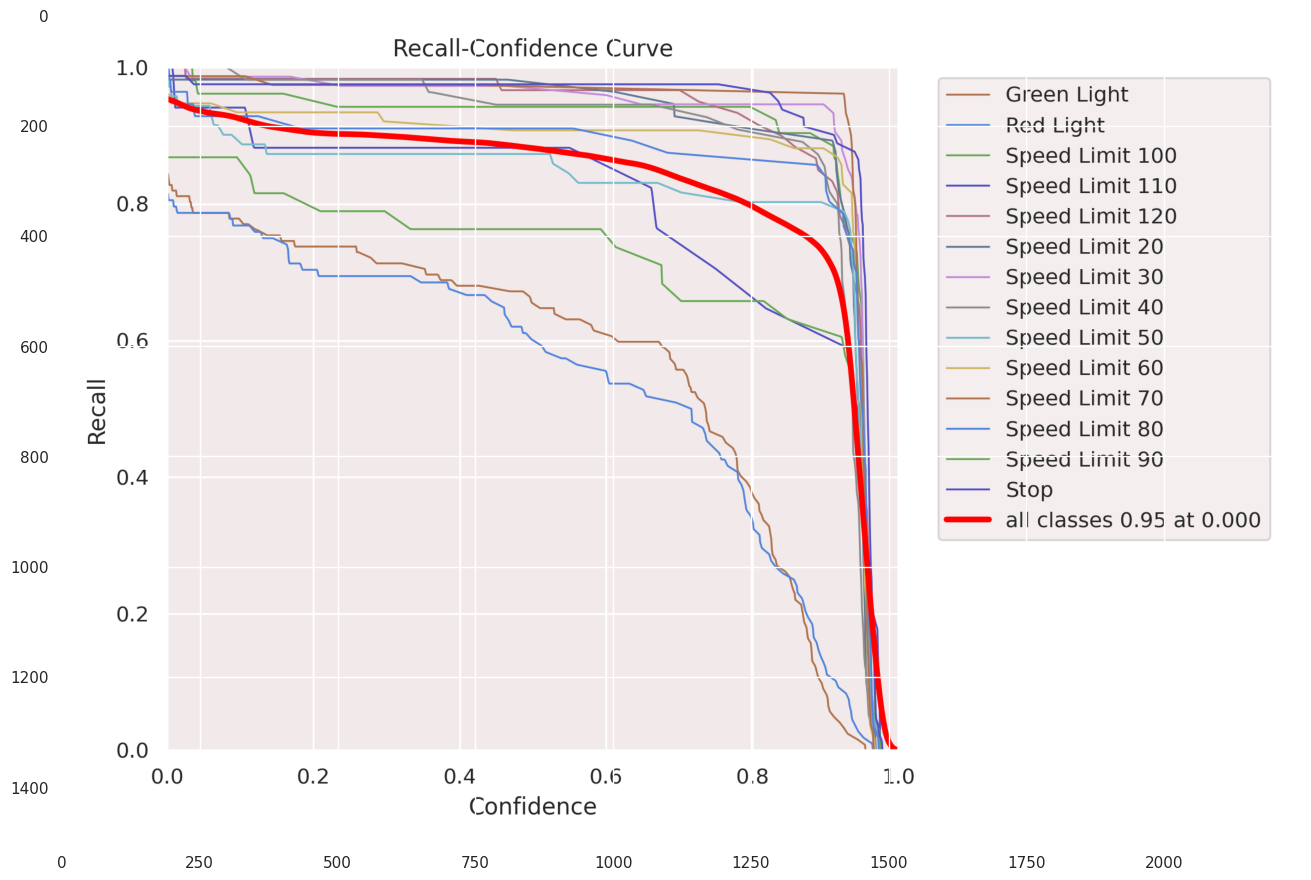

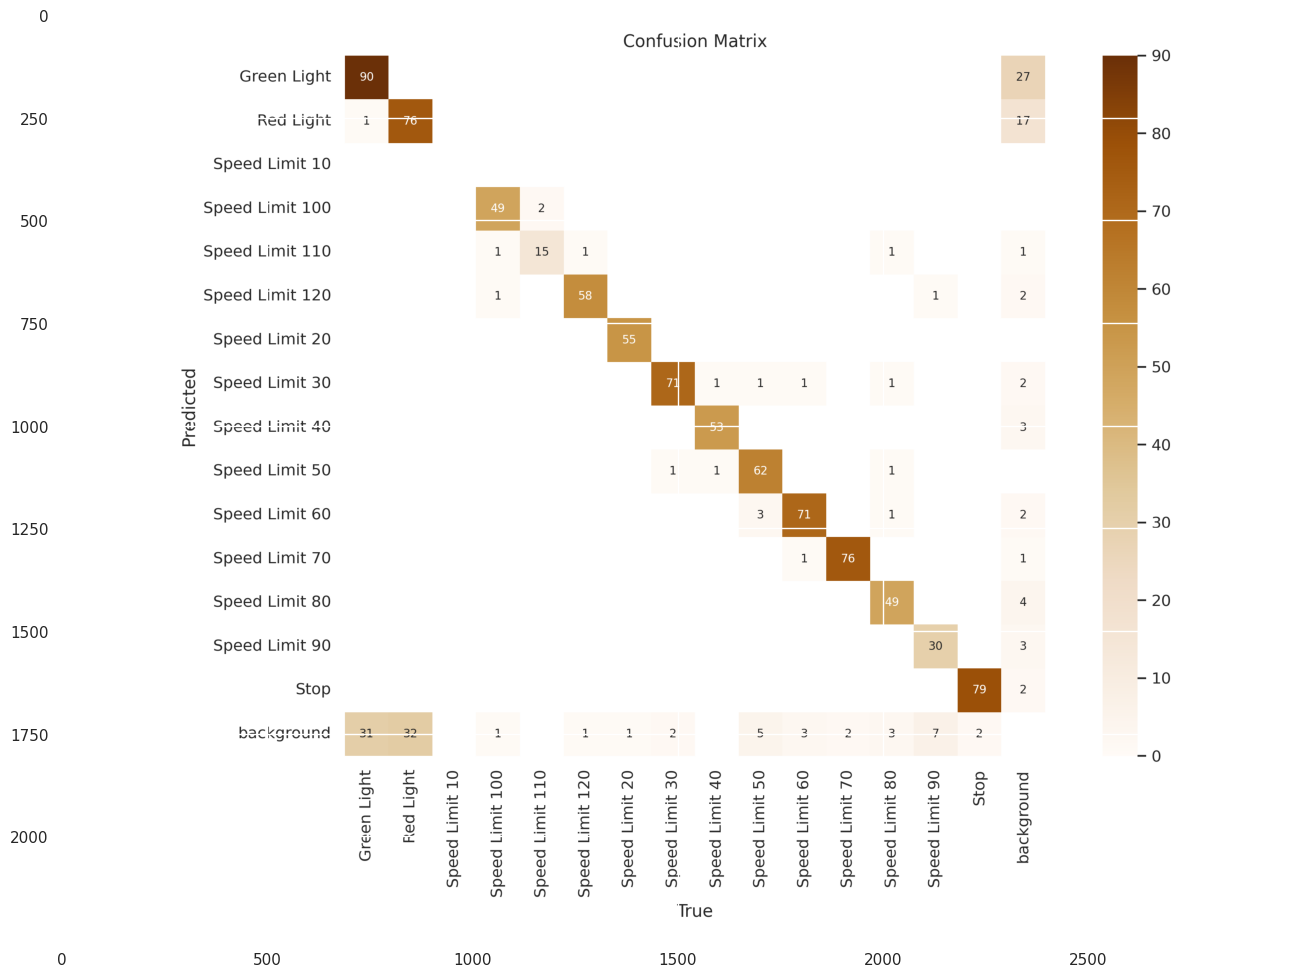

In [ ]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]
for i in list_of_metrics:
    image = cv2.imread(f'/content/runs/detect/train/{i}')
    plt.figure(figsize=(16, 12))
    plt.imshow(image)
    plt.show()

In [ ]:
Result_Final_model = pd.read_csv('/content/runs/detect/train/results.csv')
Result_Final_model.tail(10)

epoch           train/box_loss           train/cls_loss  \
90                       91                  0.44468                  0.27996   
91                       92                  0.44175                  0.27123   
92                       93                  0.43373                  0.26809   
93                       94                  0.43773                  0.26100   
94                       95                  0.42903                  0.25739   
95                       96                  0.43607                  0.26253   
96                       97                  0.42301                  0.25315   
97                       98                  0.42355                  0.25181   
98                       99                  0.42986                  0.25193   
99                      100                  0.42751                  0.25434   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
90                  0.84410                  0.94373                  0.88119   
91                  0.84764                  0.94506                  0.87864   
92                  0.84313                  0.95722                  0.87615   
93                  0.84373                  0.96340                  0.87881   
94                  0.84421                  0.96563                  0.87656   
95                  0.84420                  0.93716                  0.88939   
96                  0.84200                  0.95915                  0.88820   
97                  0.83472                  0.95923                  0.88650   
98                  0.83908                  0.95984                  0.88456   
99                  0.83612                  0.95422                  0.88900   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
90                  0.93382                  0.82040                  0.51146   
91                  0.93473                  0.81940                  0.51392   
92                  0.93661                  0.81948                  0.51366   
93                  0.93721                  0.82218                  0.51229   
94                  0.93510                  0.82241                  0.51091   
95                  0.93542                  0.82289                  0.50925   
96                  0.93804                  0.82653                  0.50920   
97                  0.93700                  0.82497                  0.50838   
98                  0.93796                  0.82482                  0.50836   
99                  0.93846                  0.82693                  0.50603   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
90                  0.30632                  0.86419                 0.000063   
91                  0.29980                  0.86456                 0.000057   
92                  0.30386                  0.86599                 0.000052   
93                  0.29734                  0.86396                 0.000047   
94                  0.29597                  0.86401                 0.000042   
95                  0.29772                  0.86276                 0.000037   
96                  0.29760                  0.86329                 0.000031   
97                  0.29358                  0.86217                 0.000026   
98                  0.29177                  0.86176                 0.000021   
99                  0.28802                  0.86136                 0.000016   

                     lr/pg1                   lr/pg2  
90                 0.000063                 0.000063  
91                 0.000057                 0.000057  
92                 0.000052                 0.000052  
93                 0.000047                 0.000047  
94                 0.000042                 0.000042  
95                 0.000037                 0.000037  
96                 0.000031                 0.000031  
97            

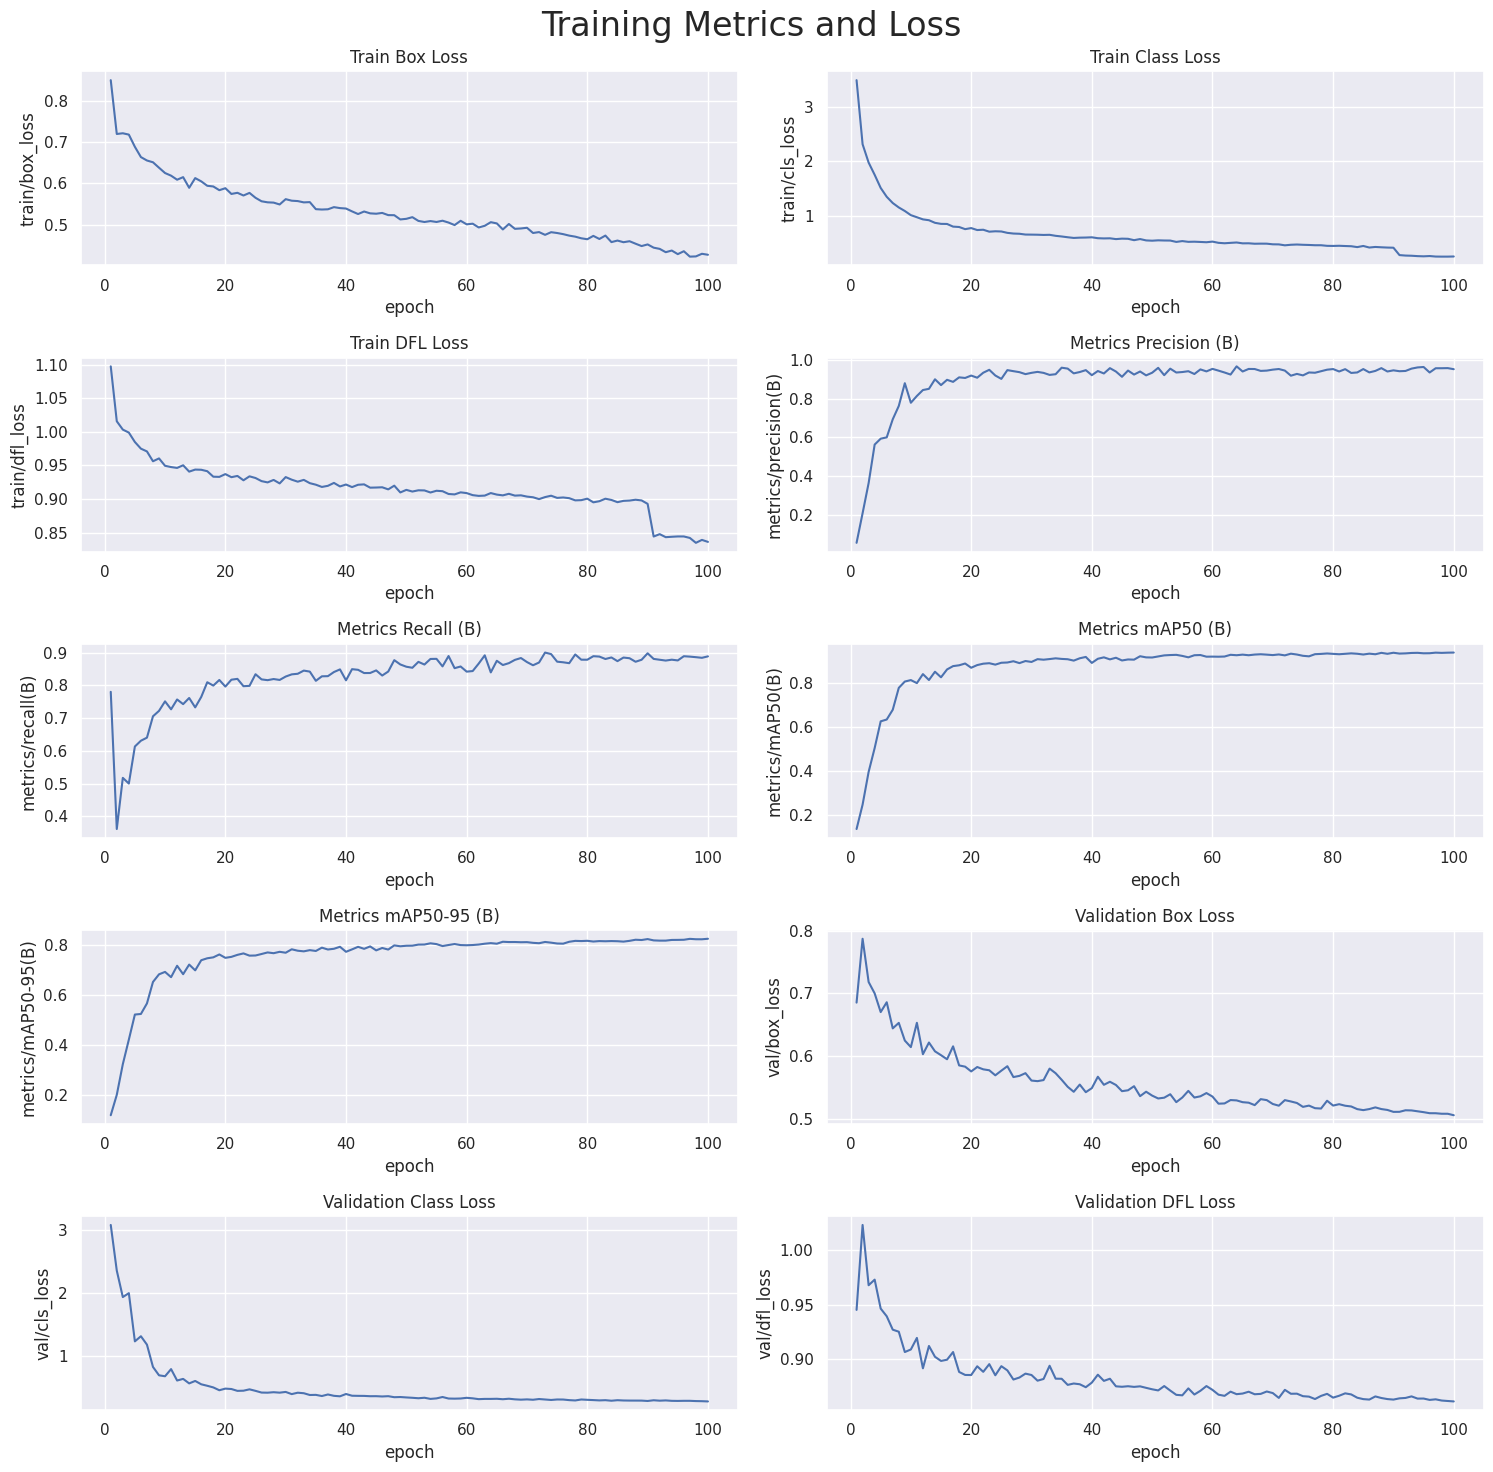

In [ ]:
# Strip whitespace from columns if necessary
Result_Final_model.columns = Result_Final_model.columns.str.strip()

# Create subplots
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=Result_Final_model, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=Result_Final_model, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=Result_Final_model, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=Result_Final_model, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=Result_Final_model, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=Result_Final_model, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=Result_Final_model, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=Result_Final_model, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=Result_Final_model, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=Result_Final_model, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')


plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.8)
plt.tight_layout()
plt.show()

In [ ]:
# Loading the best performing model
Valid_model = YOLO('/content/runs/detect/train/weights/best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(split = 'test')

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/cardetection/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<00:00, 1780.11it/s]

val: New cache created: /content/cardetection/test/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:06<00:00,  5.97it/s]


                   all        638        770      0.937      0.853      0.932      0.802
           Green Light        638        110       0.98      0.718      0.892      0.518
             Red Light        638         94      0.839      0.609      0.712      0.469
        Speed Limit 10        638          3      0.813      0.667      0.913      0.707
       Speed Limit 100        638         46      0.955      0.929       0.98       0.88
       Speed Limit 110        638         21      0.975      0.714      0.879      0.776
       Speed Limit 120        638         44      0.907      0.977      0.972      0.882
        Speed Limit 20        638         46      0.959      0.957      0.977        0.9
        Speed Limit 30        638         60      0.947      0.894       0.95       0.89
        Speed Limit 40        638         53      0.919      0.962      0.973      0.866
        Speed Limit 50        638         50      0.877      0.859      0.929      0.828
        Speed Limit 6

In [ ]:
# final results
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.936691101600291
metrics/recall(B):  0.8533493483666728
metrics/mAP50(B):  0.9316723164904778
metrics/mAP50-95(B):  0.8023844140504817


In [ ]:
# Path to the directory containing the images
image_dir = '/content/cardetection/test/images'

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.jpg')]

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    results = Final_model.predict([image], save=True, imgsz=416, conf=0.5, iou=0.7)
    #results.append(result)


0: 416x416 1 Speed Limit 20, 11.8ms
Speed: 1.8ms preprocess, 11.8ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train2

0: 416x416 1 Speed Limit 20, 13.4ms
Speed: 1.5ms preprocess, 13.4ms inference, 1.7ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train3

0: 416x416 1 Red Light, 15.5ms
Speed: 1.5ms preprocess, 15.5ms inference, 2.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train4

0: 416x416 2 Green Lights, 19.5ms
Speed: 1.0ms preprocess, 19.5ms inference, 2.3ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train5

0: 416x416 1 Speed Limit 40, 17.5ms
Speed: 0.9ms preprocess, 17.5ms inference, 1.9ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/detect/train6

0: 416x416 1 Speed Limit 50, 17.0ms
Speed: 0.9ms preprocess, 17.0ms inference, 2.6ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs/d

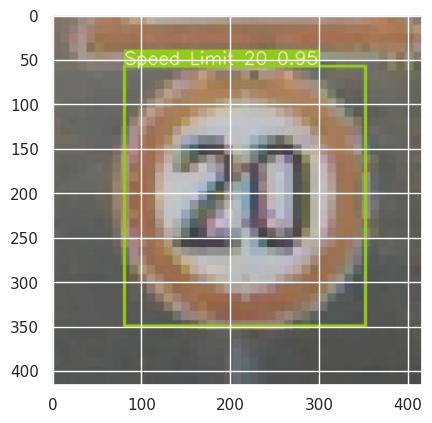

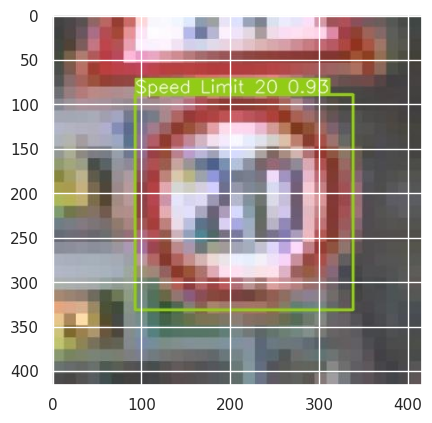

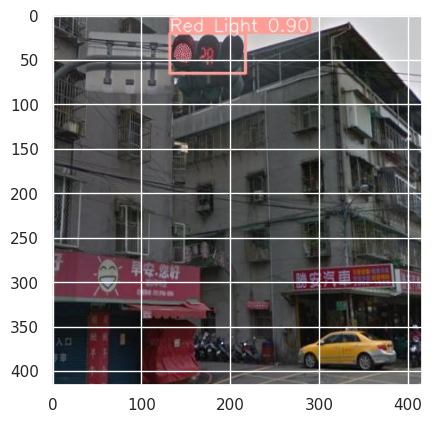

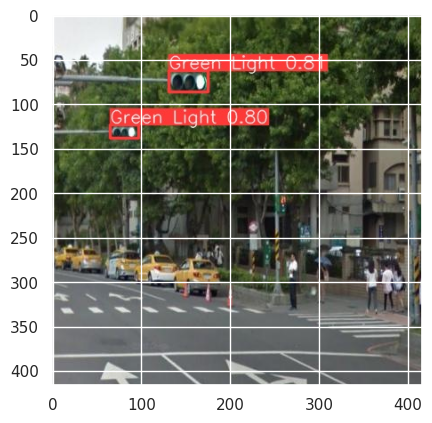

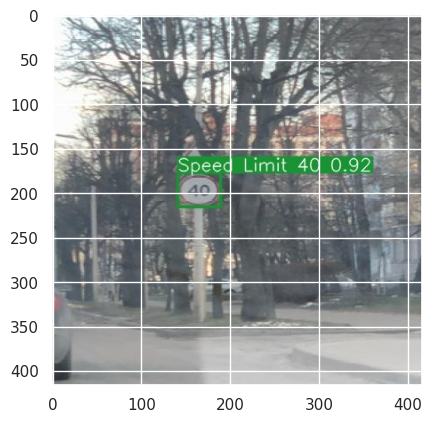

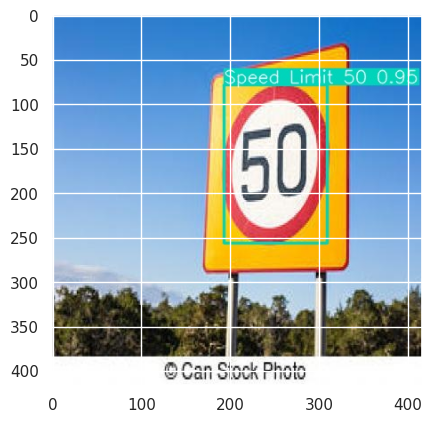

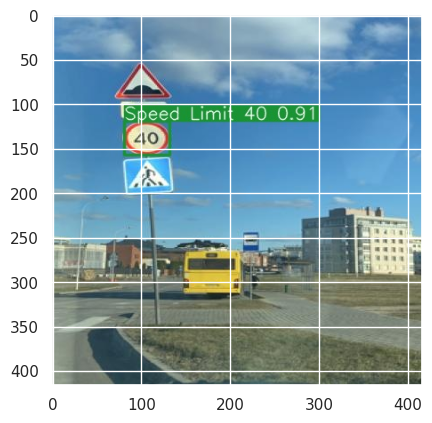

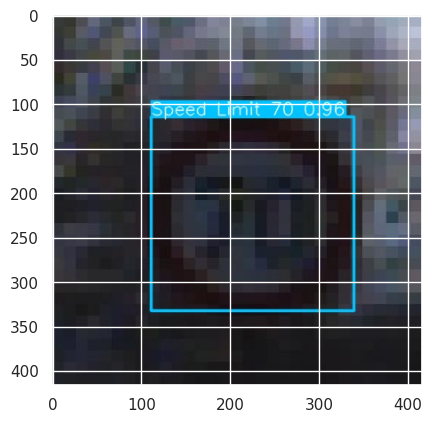

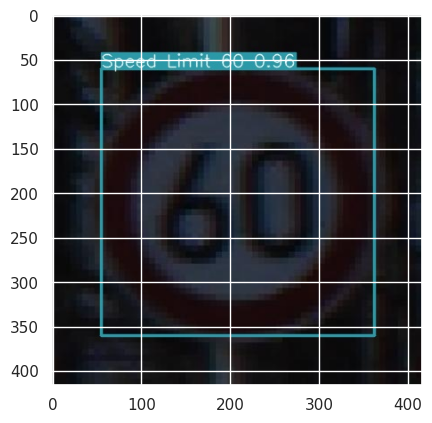

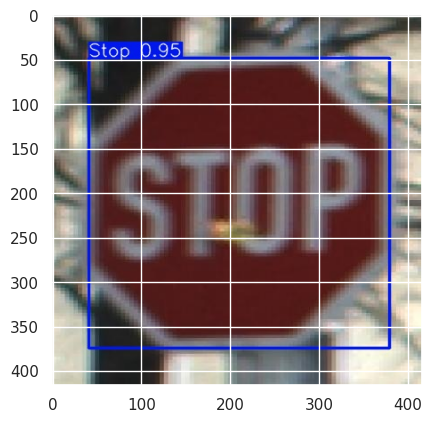

In [ ]:
# View results
for i in range(2,12):
    plt.imshow(plt.imread(f'/content/runs/detect/train{i}/image0.jpg'))
    plt.show()

In [ ]:
# Export the model
Final_model.export(format='onnx')

Ultralytics YOLOv8.1.29 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 416, 416) BCHW and output shape(s) (1, 19, 3549) (5.9 MB)
requirements: Ultralytics requirement ['onnx>=1.12.0'] not found, attempting AutoUpdate...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 94.7 MB/s eta 0:00:00

requirements: AutoUpdate success ✅ 8.8s, installed 1 package: ['onnx>=1.12.0']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 9.7s, saved as 'runs/detect/train/weights/best.onnx' (11.6 MB)

Export complete (9.8s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=416  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=416 data=/content/cardetection/data.yaml  
Vi

'runs/detect/train/weights/best.onnx'

In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"

In [ ]:
# Convert mp4
!ffmpeg -y -loglevel panic -i /kaggle/input/cardetection/video.mp4 output.mp4

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/video.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)


In [ ]:
# # Load a pr-trained model
# video_model = YOLO("yolov8n.pt")

# # Use the model to detect signs
# video_model.predict(source="/content/video.mp4", show=True, save = True)

In [ ]:
video_model = YOLO("/content/runs/detect/train/weights/best.pt")

# Use the model to detect signs
video_model.predict(source="/content/video.mp4", show=True, save = True)

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (frame 1/508) /content/video.mp4: 416x416 1 Stop, 15.7ms
video 1/1 (frame 2/508) /content/video.mp4: 416x416 1 Stop, 15.7ms
video 1/1 (frame 3/508) /content/video.mp4: 416x416 1 Stop, 9.3ms
video 1/1 (frame 4/508) /content/video.mp4: 416x416 (no detections), 11.5ms
video 1/1 (frame 5/508) /content/video.mp4: 416x416 1 Stop, 10.1ms
video 1/1 (frame 6/508) /content/video.

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Green Light', 1: 'Red Light', 2: 'Speed Limit 10', 3: 'Speed Limit 100', 4: 'Speed Limit 110', 5: 'Speed Limit 120', 6: 'Speed Limit 20', 7: 'Speed Limit 30', 8: 'Speed Limit 40', 9: 'Speed Limit 50', 10: 'Speed Limit 60', 11: 'Speed Limit 70', 12: 'Speed Limit 80', 13: 'Speed Limit 90', 14: 'Stop'}
 obb: None
 orig_img: array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
     

In [ ]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /content/runs/detect/predict/video.avi result_out.mp4

# # Display the video
# Video("result_out.mp4", width=960)

In [ ]:
from IPython.display import HTML
from base64 import b64encode

mp4 = open('/content/result_out.mp4','rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
    <source src="%s" type="video/mp4">
</video>
""" % data_url)
